In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.qtm_1qubit

Step 0: 0.8289
Step 10: 0.819
Step 20: 0.8231999999999999
Step 30: 0.8088
Step 40: 0.4899
Step 50: 0.10929999999999995
Step 60: 0.015900000000000025
Step 70: 0.0020999999999999908
Step 80: 0.00029999999999996696
Step 90: 0.0


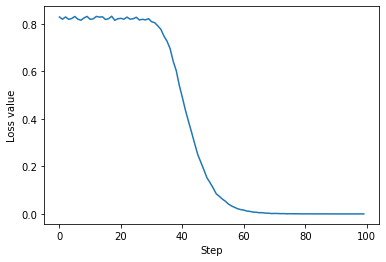

In [2]:
# Init parameters
num_qubits = 3
thetas = np.zeros((2*num_qubits*3))
theta = np.random.uniform(0, 2*np.pi)
# Init quantum tomography n qubit
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_ghz_state(qc, theta)
# Reduce loss value in 100 steps
thetas, loss_values = qtm.base_qtm.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nqubit, 
    grad_func = qtm.base_qtm.grad_l,
    loss_func = qtm.base_qtm.loss_basis,
    verbose = 2
)
# Plot loss value in 100 steps
plt.plot(loss_values)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

In [3]:
# Get statevector from circuit
psi = qiskit.quantum_info.Statevector.from_instruction(qc)
rho_psi = qiskit.quantum_info.DensityMatrix(psi)
psi_hat = qiskit.quantum_info.Statevector(qtm.qtm_nqubit.get_u_cluster_nqubit_hat(thetas, num_qubits = 3))
rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
# Calculate the metrics
trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
print("Trace: ", trace)
print("Fidelity: ", fidelity)

Trace:  0.0026577394250606955
Fidelity:  (0.9999929364211505+4.679847546811e-14j)


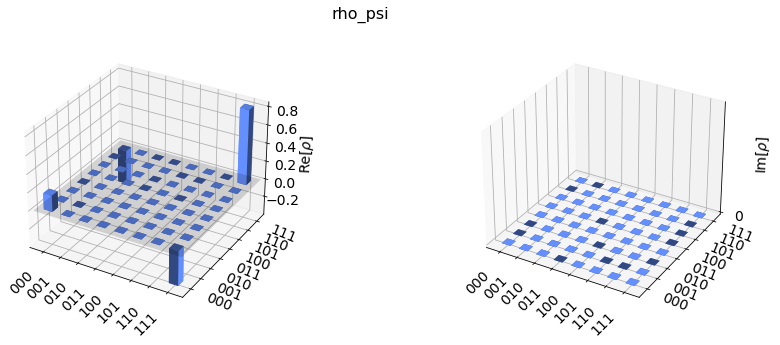

In [4]:
qiskit.visualization.plot_state_city(rho_psi, title = 'rho_psi')

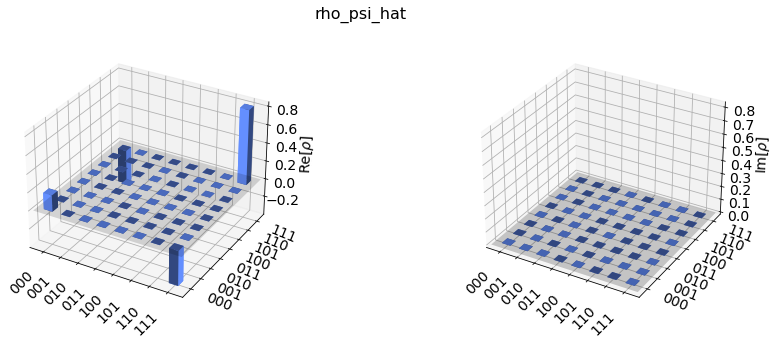

In [5]:
qiskit.visualization.plot_state_city(rho_psi_hat, title = 'rho_psi_hat')